# What factors should we consider when buying a used car?
### by Hung Huynh 

## Table of Contents
- [Introduction](#Introduction)
- [Business Understanding](#Business-Understanding)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  - [Prepare Data](#Prepare-Data)
  - [Assessing the Data](#Assessing-the-Data)
  - [Cleaning the Data](#Cleaning-the-Data)
  - [Analyse and Visualise](#Analyse-and-Visualise)
- [Data Modeling](#Data-Modeling)
- [Conclusion](#Conclusion)

## Introduction
In this project, I decided to analyse the Used Cars dataset found on [Kaggle](https://www.kaggle.com/datasets/thedevastator/uncovering-factors-that-affect-used-car-prices) using the CRISP-DM process. I also try predicting price of used cars using machine learning model.

## Business Understanding
What factors should we consider when buying a used car? Well, it's touch question. We will break it down and go through 3 small questions before making the final decision.
- What factors affect the price of a used car?
- Which brands have most used cars?
- Should we choose an automatic or manual car?

## Exploratory Data Analysis
### Prepare Data
To get started, let's import some necessary libraries and read in our dataset.

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

In [2]:
# set pandas display all the columns for us easy to look
pd.set_option('display.max_columns', None)

In [3]:
# read in the dataset
df = pd.read_csv('./data/autos.csv').drop('index', axis=1)
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


### Assessing the Data

In [4]:
# view size of the dataset
df.shape

(371528, 20)

Our dataset has 371,528 rows and 20 columns. Each row contains information of an used car. Whereas each column represents a feature of the vehicle.
- `dateCrawled`: date the ad was crawled
- `name`: name of the car
- `seller`: type of seller (private or dealer)
- `offerType`: type of offter (e.g. sale, repair, etc.)
- `price`: price of the car
- `abtest`: test type (A or B)
- `vehicleType`: type of vehicle (e.g. SUV, sedan, etc.)
- `yearOfRegistration`: year the car was registered
- `gearbox`: type of gearbox (manual or automatic)
- `powerPS`: power of the car in PS
- `model`: model of the car
- `kilometer`: kilometers the car has been driven
- `monthOfRegistration`: month the car was registered
- `fuelType`: type of fuel (e.g. diesel, petrol, etc.)
- `brand`: brand of the car
- `notRepairedDamage`: whether or not the car has any damage that has not been repaired
- `dateCreated`: date the ad was created
- `nrOfPictures`: number of pictures of the car
- `postalCode`: postal code of the car
- `lastSeen`: date the ad was last seen

In [5]:
# info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

Let's take a look at the datatype. The `dateCrawled`, `dateCreated`, and `lastSeen` should be datatime instead of string. Also the `postalCode` has no meaning if it is numeric.

In [6]:
# proportion of missing values in each column
df.isnull().mean().sort_values(ascending=False)

notRepairedDamage      0.193956
vehicleType            0.101928
fuelType               0.089861
model                  0.055134
gearbox                0.054394
lastSeen               0.000000
yearOfRegistration     0.000000
name                   0.000000
seller                 0.000000
offerType              0.000000
price                  0.000000
abtest                 0.000000
powerPS                0.000000
postalCode             0.000000
kilometer              0.000000
monthOfRegistration    0.000000
brand                  0.000000
dateCreated            0.000000
nrOfPictures           0.000000
dateCrawled            0.000000
dtype: float64

The column `notRepairedDamage` has many missing values (nearly 20%), following by `vehicleType`, `fuelType`, `model` and `gearbox`. Other columns have no missing values.

In [7]:
def count_values(df, columns, limit=None):
    """
    Display number of unique values and value counts in each column
    :param df: the pandas dataframe
    :param columns: the list of columns need to count values
    :param limit: int - limit the number of values displayed, default display all
    """
    for col in columns:
        nunique = df[col].nunique()
        print("="*30)
        print("Column: {} - {} unique values".format(col, nunique))
        print("="*30)
        print(df[col].value_counts()[:limit])
        print()

In [8]:
columns_to_check_values = ['seller', 'offerType', 'abtest', 'vehicleType', 'gearbox', 
                           'model', 'fuelType', 'brand', 'notRepairedDamage']
count_values(df, columns_to_check_values, limit=10)

Column: seller - 2 unique values
privat        371525
gewerblich         3
Name: seller, dtype: int64

Column: offerType - 2 unique values
Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

Column: abtest - 2 unique values
test       192585
control    178943
Name: abtest, dtype: int64

Column: vehicleType - 8 unique values
limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

Column: gearbox - 2 unique values
manuell      274214
automatik     77105
Name: gearbox, dtype: int64

Column: model - 251 unique values
golf        30070
andere      26400
3er         20567
polo        13092
corsa       12573
astra       10830
passat      10306
a4          10257
c_klasse     8775
5er          8546
Name: model, dtype: int64

Column: fuelType - 7 unique values
benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        2

From the above result, we can see that the `seller` and `offerType` only have 2 values, but one of them accounts for almost the entire value. Therefore in this case, two these columns are not much meaning.

In [9]:
# view some statistics of the quantity columns
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


The `yearOfRegistration` has invalid values (1000 and 9999). The `monthOfRegistration` also has invalid value (0).

The `nrOfPictures` have only one value 0.

#### Summary
After assessing, our dataset has some of the following problems:
- Columns have incorrect datatype: `dateCrawled`, `dateCreated`, `lastSeen`, `postalCode`
- Columns have only one value (or nearly so): `nrOfPictures`, `seller`, `offerType`
- Columns have invalid value: `yearOfRegistration`, `monthOfRegistration`
- Columns have missing value: `notRepairedDamage`, `vehicleType`, `fuelType`, `model`, `gearbox`

### Cleaning the Data
Firstly, we need to drop useless columns.

In [10]:
# make a copy of our dataset
df_cleaned = df.copy()

In [11]:
# drop useless columns
columns_to_drop = ['dateCrawled', 'dateCreated', 'lastSeen', 'postalCode', 'name',
                   'nrOfPictures', 'seller', 'offerType', 'monthOfRegistration']
df_cleaned.drop(columns=columns_to_drop, inplace=True)
df_cleaned.columns

Index(['price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage'],
      dtype='object')

Then we deal with missing values. We can fill missing values of columns `notRepairedDamage`, `vehicleType`, `fuelType`, `gearbox` with the mode value. The `model` column is better if we fill missing values with `unknown`.

In [12]:
def fillna_with_mode(df, columns):
    """
    Fill missing values in columns with mode
    :param df: the pandas dataframe
    :param columns: the list of columns need to fill missing values
    :return: the dataframe after fillna with mode
    """
    for col in columns:
        df[col].fillna(df[col].mode()[0], inplace=True)
    return df

In [13]:
# fill missing values with mode
columns_to_fillna = ['notRepairedDamage', 'vehicleType', 'fuelType', 'gearbox']
df_cleaned = fillna_with_mode(df_cleaned, columns_to_fillna)

In [14]:
# fill missing value in `model` column with `unknown` value
df_cleaned['model'].fillna('unknown', inplace=True)

In [15]:
# check the result
df_cleaned.isnull().mean()

price                 0.0
abtest                0.0
vehicleType           0.0
yearOfRegistration    0.0
gearbox               0.0
powerPS               0.0
model                 0.0
kilometer             0.0
fuelType              0.0
brand                 0.0
notRepairedDamage     0.0
dtype: float64

There are some invalid values in our dataset. They are a part of outliers. Let's determine and remove these outliers.

In [16]:
def remove_outliers(df, columns):
    """
    Remove the outliers in columns
    :param df: the pandas dataframe
    :param columns: the list of columns need to remove outliers
    :return df: the dataframe after remove outliers
    """
    index_list = [] # list of outlier indexes
    for col in columns:
        Q1 = df[col].quantile(0.1) # first quartile
        Q3 = df[col].quantile(0.9) # third quartile
        IQR = Q3 - Q1 
        upper = Q3 + 1.5 * IQR # upper bound
        lower = Q1 - 1.5 * IQR # lower bound
        ls = df.index[(df[col] < lower) | (df[col] > upper)]
        index_list.extend(ls)
    # remove outliers
    index_list = sorted(set(index_list))
    df = df.drop(index_list)
    print("Removed {} rows".format(len(index_list)))
    return df

In [17]:
# remove outliers
num_vars = ['price', 'yearOfRegistration', 'powerPS', 'kilometer']
df_cleaned = remove_outliers(df_cleaned, num_vars)

Removed 6374 rows


Finally, let's check the dataset after cleaning.

In [18]:
df_cleaned.shape

(365154, 11)

In [19]:
df_cleaned.sample(5)

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
236120,600,test,kleinwagen,1996,manuell,45,corsa,150000,benzin,opel,nein
133381,4590,control,bus,2009,manuell,106,kangoo,150000,benzin,renault,nein
291231,1800,control,kombi,2000,automatik,230,a6,150000,benzin,audi,ja
175797,1000,test,kleinwagen,1992,manuell,45,andere,150000,benzin,fiat,nein
61919,3000,test,limousine,2005,manuell,0,sharan,150000,diesel,volkswagen,nein


### Analyse and Visualise

***Question 1: What factors affect the price of a used car?***

To answer this question, we will take a look at the relationship between price and other features.

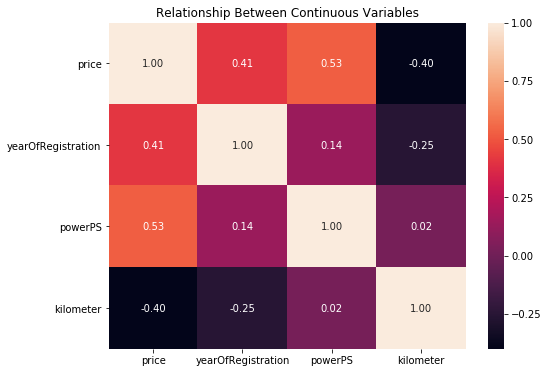

In [20]:
# visualise the correlation coefficient by heatmap
corr = df_cleaned[num_vars].corr()
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Relationship Between Continuous Variables')
plt.show()

The `powerPS` and `yearOfRegistration` have a positive relationship with price. Whereas, the `kilometer` has a negative one.

That means vehicles that are recently registered, higher horsepower engines, or less mileage will have a higher price.

In [21]:
def draw_boxplot(ax, df, x, y):
    """
    Draw boxplot visualise the relationship between x and y
    :param ax: the axis where the plot located in the figure
    :param df: the pandas dataframe
    :param x: categorical column in x axis
    :param y: continuous column in y axis
    """
    order = list(df[[x, y]].groupby(x).mean().sort_values(by=y, ascending=False).index)
    sns.boxplot(ax=ax, data=df, x=x, y=y, order=order)

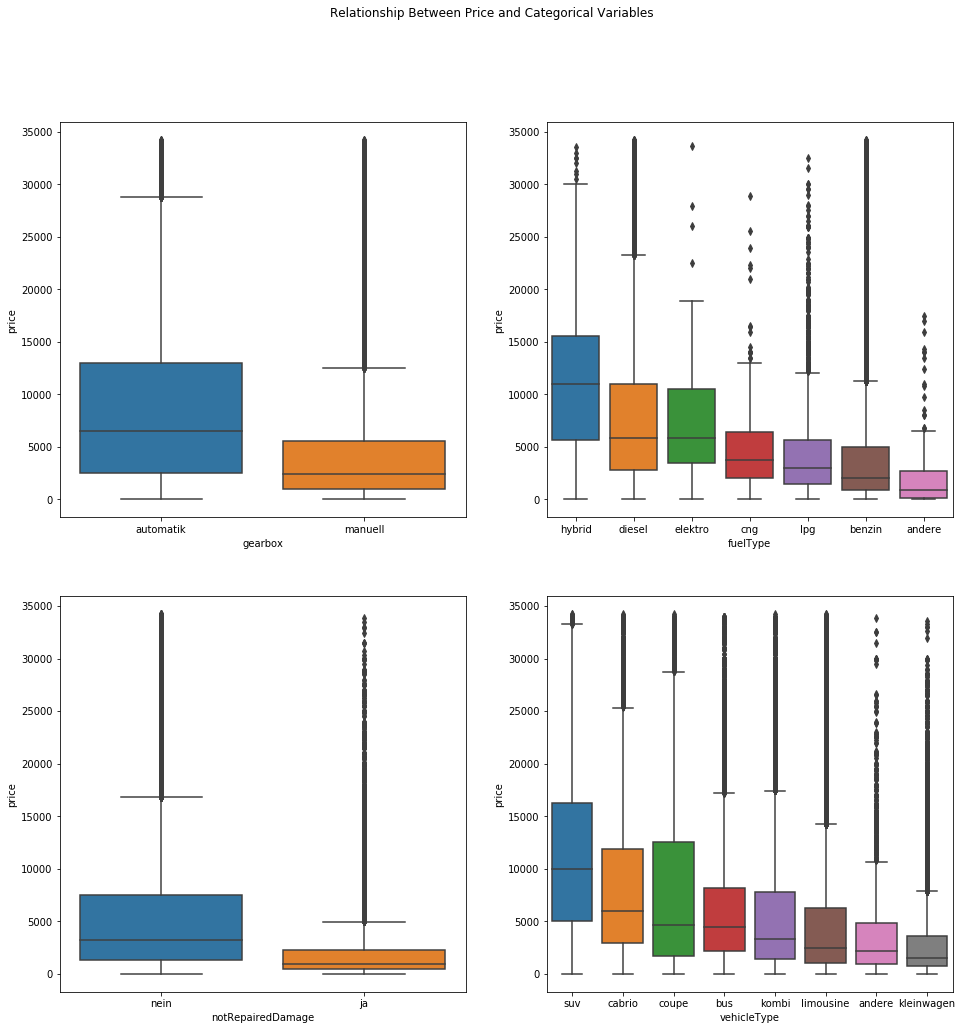

In [22]:
# visualise the relationship between price and categorical variables
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
fig.suptitle('Relationship Between Price and Categorical Variables')
draw_boxplot(axes[0, 0], df_cleaned, x='gearbox', y='price')
draw_boxplot(axes[0, 1], df_cleaned, x='fuelType', y='price')
draw_boxplot(axes[1, 0], df_cleaned, x='notRepairedDamage', y='price')
draw_boxplot(axes[1, 1], df_cleaned, x='vehicleType', y='price')
plt.show()

According to the plot:
- Vehicle with `automatic gearbox` has higher price than `manual gearbox`.
- Vehicle with `repaired damage` has higher price than `not repaired damage`.
- Vehicle with `hybrid fuel type` has higher price than others.
- Vehicle with `suv type` has higher price than others.

In [23]:
def draw_barplot(df, x, y, limit=None):
    """
    Draw barplot visualise the relationship between x and y
    :param df: the pandas dataframe
    :param x: categorical column in x axis
    :param y: continuous column in y axis
    :param limit: limit the number of bars - default None: no limit
    """
    df_ordered = df[[x, y]].groupby(x).mean().reset_index().sort_values(by=y, ascending=False)[:limit]
    sns.barplot(data=df_ordered, x=x, y=y)

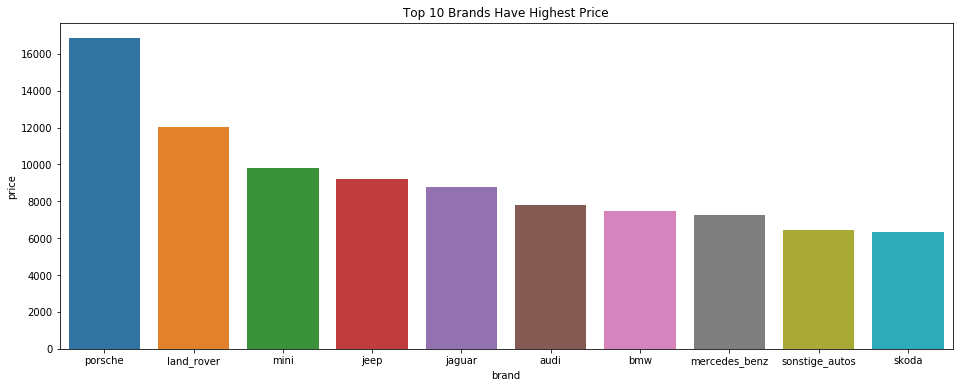

In [24]:
# Plot top 10 brands have highest price
plt.rcParams['figure.figsize'] = (16, 6)
plt.title('Top 10 Brands Have Highest Price')
draw_barplot(df_cleaned, x='brand', y='price', limit=10)
plt.show()

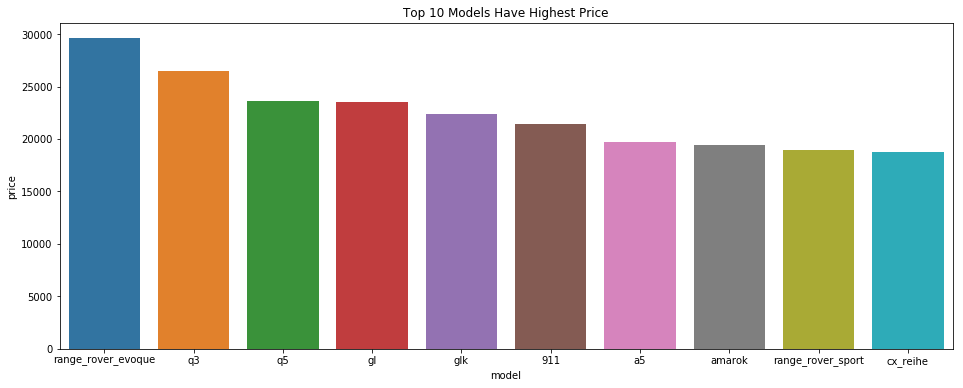

In [25]:
# Plot top 10 models have highest price
plt.rcParams['figure.figsize'] = (16, 6)
plt.title('Top 10 Models Have Highest Price')
draw_barplot(df_cleaned, x='model', y='price', limit=10)
plt.show()

`Porsche` vehicles have highest price. However, the models having highest price are `Land Rover Range Rover Evoque`, `Audi Q3` and `Audi Q5`.

***Question 2: Which brands have most used cars?***

In [26]:
# count the values of brand
brand_counts = df_cleaned.brand.value_counts()

print("Number of brands: {}".format(brand_counts.shape[0]))
[print("Ranked {} brand: {} - {} cars ({:.2f}%)".format(i + 1, brand_counts.index[i], brand_counts[i], \
                                                 brand_counts[i] / df_cleaned.shape[0] * 100)) for i in range(3)]

Number of brands: 40
Ranked 1 brand: volkswagen - 78995 cars (21.63%)
Ranked 2 brand: opel - 39968 cars (10.95%)
Ranked 3 brand: bmw - 39450 cars (10.80%)


[None, None, None]

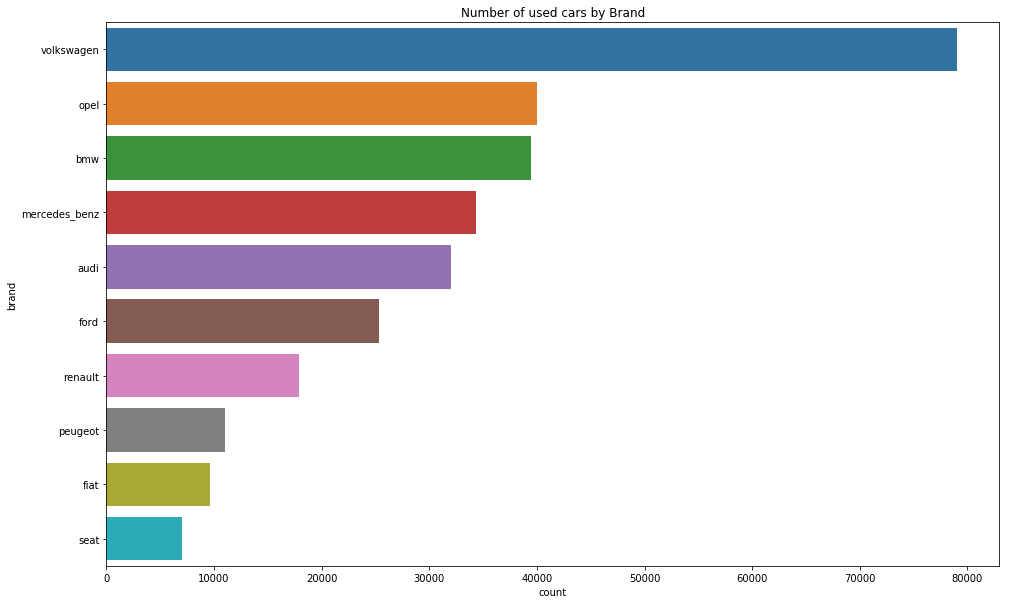

In [27]:
# draw plot visualise the number of used cars by brand
plt.rcParams['figure.figsize'] = (16, 10)
sns.countplot(data=df_cleaned, y='brand', order=brand_counts.index[:10])
plt.title("Number of used cars by Brand")
plt.show()

There are 40 car brands in the dataset. 
The number of `Volkswagen` used cars accounted for the most in the data set, up to 79000 vehicles (22%), nearly equal to the total number of used cars of the 2nd and 3rd ranked brand, `Opel` and `BMW`.

***Question 3: Should we choose an automatic or manual car?***

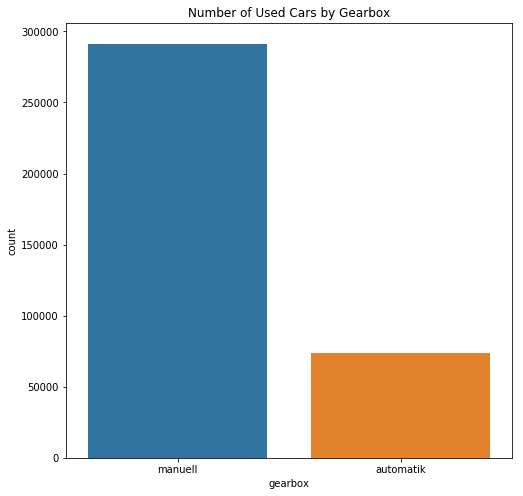

In [28]:
# draw plot visualise the number of used cars by gearbox
plt.rcParams['figure.figsize'] = (8, 8)
sns.countplot(data=df_cleaned, x='gearbox')
plt.title('Number of Used Cars by Gearbox')
plt.show()

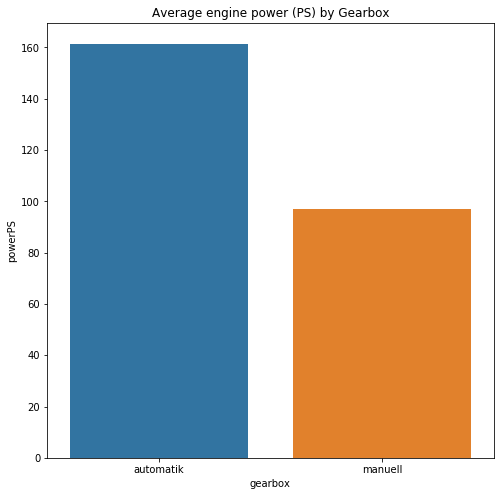

In [29]:
# visualise the powerPS by gearbox
df_gearbox = df_cleaned.groupby(by='gearbox').mean().reset_index()
sns.barplot(data=df_gearbox, x='gearbox', y='powerPS',)
plt.title('Average engine power (PS) by Gearbox')
plt.show()

- The number of manual cars is nearly 4 times more than automatic cars. That gives you more choices when choosing manual cars.
- Whereas automatic gearbox has higher average enginer power and also higher price than manual gearbox. That's understandable since automatic vehicles adopt more modern technology.

## Data Modeling

Next, we will build a machine learning model used to predict car prices.

Firstly, I create a dummy dataframe to convert categorical variables to numeric variables. Then I use **Random Forest** to build our model. And I use cross validation technique to train and validate the model based on r-score.

In [30]:
# create dummies for categorical variables
cat_vars = list(df_cleaned.select_dtypes('object').columns)
df_dummies = pd.get_dummies(df_cleaned, prefix=cat_vars, columns=cat_vars, drop_first=True)
df_dummies.shape

(365154, 309)

In [31]:
# split X and y
y = df_dummies['price']
X = df_dummies.drop('price', axis=1)

In [32]:
# initiate the model and use cross validation to train the model
model = RandomForestRegressor()
result = cross_validate(model, X, y, cv=5, verbose=2, return_train_score=True)

[CV]  ................................................................
[CV] ................................................. , total= 1.0min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] ................................................. , total=  59.5s
[CV]  ................................................................
[CV] ................................................. , total=  59.0s
[CV]  ................................................................
[CV] ................................................. , total= 1.0min
[CV]  ................................................................
[CV] ................................................. , total=  58.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.2min finished


In [33]:
# get average score after 5 times training
train_score = result['train_score'].mean()
test_score = result['test_score'].mean()
print("train score: {}\ntest score: {}".format(train_score, test_score))

train score: 0.9584910060801859
test score: 0.8673186850250547


The test score is pretty high 86.7% and the train score is 95.8%. It seems our model is a little bit overfitting, but in general it's a good model to predict used car prices. 

## Conclusion

I used a dataset from Kaggle about used cars. After assessing, cleaning and analysing the dataset, I have some conclusion for our questions:
- ***Question 1: What factors affect the price of a used car?***

There are many factors affect the used car price. Some positive (engine power, year of registration), some negative (milage), some depends on the type of gearbox, fuel type, vehicle type, brand, model, and whether damaged has been repaired or not.
- ***Question 2: Which brands have most used cars?***

`Volkswagen` has most used cars. It can be a good choice since its price does not in top 10 expensive cars.
- ***Question 3: Should we choose an automatic or manual car?***

The manual gearbox has more cars than automatic one. However, automatic cars are more modern, they has higher engine power and also higher price. Therefore the final decision depends on your opinion.

For a reference price when choosing a used car, you can use the above model to predict car price. It can predict up to 86.7% accuracy.